In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib as plt

In [2]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data"
n1 = path + '\Stocks_Prices_1399-07-20' + '.csv'
df1 = pd.read_csv(n1)
df1 = df1[['jalaliDate', 'date', 'name','group_name','close_price', 'volume','quantity']]

In [3]:
def vv(row):
    X = row.split('-')
    return X[0]+X[1]+X[2]

In [4]:
def DriveYearMonthDay(d):
    d['jalaliDate'] = d['jalaliDate'].astype(str)
    d['Year'] = d['jalaliDate'].str[0:4]
    d['Month'] = d['jalaliDate'].str[4:6]
    d['Day'] = d['jalaliDate'].str[6:8]
    d['jalaliDate'] = d['jalaliDate'].astype(int)
    return d

In [5]:
df1['jalaliDate'] = df1['jalaliDate'].apply(vv)

In [6]:
df = df1

In [7]:
symbols = [ 'سپرده','هما','وهنر-پذيره','نکالا','تکالا','اکالا','توسعه گردشگری ','وآفر','ودانا','نشار','نبورس','چبسپا','بدکو','چکارم','تراک','کباده','فبستم','تولیددارو','قیستو','خلیبل','پشاهن','قاروم','هوایی سامان','کورز','شلیا','دتهران','نگین','کایتا','غیوان','تفیرو','سپرمی','بتک']
df = df.drop(df[df['name'].isin(symbols)].index)
df = df.drop(df[df.group_name== 'صندوق سرمایه گذاری قابل معامله'].index)
df = df.drop(df[df.group_name=='فعاليتهاي كمكي به نهادهاي مالي واسط'].index)
df = df.drop(df[(df.name == 'اتکای')&(df.close_price == 1000)].index)
df = df.drop_duplicates()
df = df.drop(df.loc[(df['volume'] == 0)].index).sort_values(by =['name','jalaliDate']).drop(columns = ['volume','quantity'])
df = DriveYearMonthDay(df)

In [8]:
path2 = r"G:\TseClient\Data adjusted"
index = pd.read_excel(path2 + '\IRX6XTPI0009.xls')[['<COL14>','<CLOSE>']].rename(columns = {'<COL14>':'jalaliDate','<CLOSE>':'Index'})
index['30Market_return'] =  index['Index'].pct_change(periods = 30)*100
index = DriveYearMonthDay(index)

In [9]:
n = path + '\RiskFree.xlsx'
df3 = pd.read_excel(n)
df3 = df3.rename(columns = {'Unnamed: 2' : 'Year'})
df3['YM'] = df3['YM'].astype(str)
df3['YM'] = df3['YM'] + '00'
df3['YM'] = df3['YM'].astype(int)
df4 = index
df4['MRiskFree'] = np.nan
df4['jalaliDate'] = df4['jalaliDate'].astype(int)
for i in df3.YM:
    df4.loc[df4.jalaliDate>= i,'MRiskFree'] = df3.loc[df3['YM'] == i ].iloc[0,1]/12

In [10]:
index = df4

In [11]:
# gg = index.groupby(['Year','Month'])
# def mindex(g):
#     g['MonthlyMarketReturn'] = (g.Index.iloc[-1] - g.Index.iloc[0])/g.Index.iloc[0] * 100
#     return g
# index = gg.apply(mindex)    

In [12]:
index

,jalaliDate,Index,30Market_return,Year,Month,Day,MRiskFree,MonthlyMarketReturn
0,13870916,9178.3,NaN,1387,09,16,1.250000,-3.499559
1,13870917,9130.5,NaN,1387,09,17,1.250000,-3.499559
2,13870918,9089.2,NaN,1387,09,18,1.250000,-3.499559
3,13870920,9023.7,NaN,1387,09,20,1.250000,-3.499559
4,13870923,8973.3,NaN,1387,09,23,1.250000,-3.499559
5,13870924,8907.0,NaN,1387,09,24,1.250000,-3.499559
6,13870925,8890.7,NaN,1387,09,25,1.250000,-3.499559
7,13870926,8869.0,NaN,1387,09,26,1.250000,-3.499559
8,13870930,8857.1,NaN,1387,09,30,1.250000,-3.499559
9,13871001,8851.6,NaN,1387,10,01,1.250000,-4.340458


In [13]:
gg = df.groupby(['name'])
df['30return'] =  gg['close_price'].pct_change(periods = 30)*100

In [14]:
dm = pd.DataFrame()
def monthlyreturn(sgg):
    sgg['MonthlyReturn'] = (sgg.close_price.iloc[-1] - sgg.close_price.iloc[0])/sgg.close_price.iloc[0] * 100
    return sgg
for i in gg.groups.keys():
    g = gg.get_group(i)
    sg = g.groupby(['Year','Month'])
    f = sg.apply(monthlyreturn)
    dm = dm.append(f)

In [15]:
dm

,jalaliDate,date,name,group_name,close_price,Year,Month,Day,30return,MonthlyReturn
1635612,13900422,20110713,آ س پ,انبوه سازي، املاك و مستغلات,3100.0,1390,04,22,NaN,1.516129
1635611,13900425,20110716,آ س پ,انبوه سازي، املاك و مستغلات,3252.0,1390,04,25,NaN,1.516129
1635610,13900427,20110718,آ س پ,انبوه سازي، املاك و مستغلات,3264.0,1390,04,27,NaN,1.516129
1635609,13900428,20110719,آ س پ,انبوه سازي، املاك و مستغلات,3203.0,1390,04,28,NaN,1.516129
1635608,13900429,20110720,آ س پ,انبوه سازي، املاك و مستغلات,3147.0,1390,04,29,NaN,1.516129
1635607,13900501,20110723,آ س پ,انبوه سازي، املاك و مستغلات,3163.0,1390,05,01,NaN,6.291495
1635606,13900502,20110724,آ س پ,انبوه سازي، املاك و مستغلات,3112.0,1390,05,02,NaN,6.291495
1635605,13900503,20110725,آ س پ,انبوه سازي، املاك و مستغلات,2995.0,1390,05,03,NaN,6.291495
1635604,13900504,20110726,آ س پ,انبوه سازي، املاك و مستغلات,3040.0,1390,05,04,NaN,6.291495
1635603,13900505,20110727,آ س پ,انبوه سازي، املاك و مستغلات,3049.0,1390,05,05,NaN,6.291495


In [54]:
data = dm.merge(index,on = ['jalaliDate','Year','Month','Day']).sort_values(by =['name','jalaliDate']).dropna()

In [55]:
data

,jalaliDate,date,name,group_name,close_price,Year,Month,Day,30return,MonthlyReturn,Index,30Market_return,MRiskFree,MonthlyMarketReturn
5767,13900606,20110828,آ س پ,انبوه سازي، املاك و مستغلات,3618.0,1390,06,06,16.709677,3.270762,25475.1,4.893213,1.416667,6.195129
5988,13900607,20110829,آ س پ,انبوه سازي، املاك و مستغلات,3579.0,1390,06,07,10.055351,3.270762,25621.7,5.227341,1.416667,6.195129
6205,13900608,20110830,آ س پ,انبوه سازي، املاك و مستغلات,3628.0,1390,06,08,11.151961,3.270762,25822.0,5.565254,1.416667,6.195129
6428,13900612,20110903,آ س پ,انبوه سازي، املاك و مستغلات,3755.0,1390,06,12,17.233843,3.270762,26083.4,6.486328,1.416667,6.195129
6649,13900613,20110904,آ س پ,انبوه سازي، املاك و مستغلات,3782.0,1390,06,13,20.177947,3.270762,26254.6,6.717340,1.416667,6.195129
6875,13900614,20110905,آ س پ,انبوه سازي، املاك و مستغلات,3785.0,1390,06,14,19.664875,3.270762,26360.8,6.252418,1.416667,6.195129
7104,13900615,20110906,آ س پ,انبوه سازي، املاك و مستغلات,3783.0,1390,06,15,21.561697,3.270762,26714.7,6.087754,1.416667,6.195129
7335,13900616,20110907,آ س پ,انبوه سازي، املاك و مستغلات,3702.0,1390,06,16,23.606010,3.270762,26930.2,6.336721,1.416667,6.195129
7557,13900619,20110910,آ س پ,انبوه سازي، املاك و مستغلات,3751.0,1390,06,19,23.388158,3.270762,27098.4,6.541483,1.416667,6.195129
7781,13900620,20110911,آ س پ,انبوه سازي، املاك و مستغلات,3656.0,1390,06,20,19.908167,3.270762,27099.9,6.391774,1.416667,6.195129


In [56]:
data['E30Market_return'] = data['30Market_return'] - data['MRiskFree']
data['E30return'] = data['30return'] - data['MRiskFree']
data['EMonthlyReturn'] = data['MonthlyReturn'] - data['MRiskFree']
data['EMonthlyMarketReturn'] = data['MonthlyMarketReturn'] - data['MRiskFree']

In [57]:
data = data.groupby(['name','Year','Month']).last().reset_index()

In [58]:
gdata = data.groupby(['name'])
# def beta(g):
#     y = 'E30return'
#     x = 'E30Market_return'
#     g = g.dropna()
#     # Add a constant term like so:
#     if len(g)>30:
#         try:
#             model = sm.OLS(g[y], sm.add_constant(g[x])).fit()
#             beta = model.params[1]
#             alpha = model.params[0]
#             g['u'] = g[y] - alpha - beta * g[x]
#         except:
#             beta = np.nan
#             alpha = np.nan
#             g['u'] = np.nan
#     else:
#         beta = np.nan
#         alpha = np.nan
#         g['u'] = np.nan
        
#     g['α'] = alpha
#     g['β'] = beta
    
#     return g

def beta(g):
    y = 'EMonthlyReturn'
    x = 'EMonthlyMarketReturn'
    g = g.dropna()
    # Add a constant term like so:
    if len(g)>30:
        try:
            model = sm.OLS(g[y], sm.add_constant(g[x])).fit()
            beta = model.params[1]
            alpha = model.params[0] 
            g['u'] = g[y] - alpha - beta * g[x]
        except:
            beta = np.nan
            alpha = np.nan
            g['u'] = np.nan
    else:
        beta = np.nan
        alpha = np.nan
        g['u'] = np.nan
        
    g['α'] = alpha
    g['β'] = beta
    return g

data = gdata.apply(beta)

In [61]:
data.describe()

,jalaliDate,date,close_price,30return,MonthlyReturn,Index,30Market_return,MRiskFree,MonthlyMarketReturn,E30Market_return,E30return,EMonthlyReturn,EMonthlyMarketReturn,u,α,β
count,5.595500e+04,5.595500e+04,55955.000000,55955.000000,55955.000000,5.595500e+04,55955.000000,55955.000000,55955.000000,55955.000000,55955.000000,55955.000000,55955.000000,5.417100e+04,54171.000000,54171.000000
mean,1.394341e+07,2.015584e+07,9295.629595,7.362977,4.268519,2.026431e+05,6.632955,1.411197,4.524906,5.221758,5.951779,2.857322,3.113709,-8.493039e-17,0.675648,0.717389
std,3.275194e+04,3.263729e+04,19419.213690,36.818596,18.061357,3.748748e+05,14.178272,0.198338,10.020155,14.197815,36.815548,18.059024,10.042350,1.606752e+01,1.935012,0.300056
min,1.387110e+07,2.009012e+07,149.000000,-95.917949,-90.653699,7.965800e+03,-23.926075,1.166667,-10.682059,-25.259409,-97.751282,-92.312924,-12.015392,-1.160911e+02,-3.150543,-0.315625
25%,1.392042e+07,2.013071e+07,1871.000000,-8.883977,-4.790185,5.429870e+04,-1.761229,1.250000,-2.029503,-3.108152,-10.291937,-6.201214,-3.344099,-7.818924e+00,-0.570200,0.526456
50%,1.395033e+07,2.016062e+07,3702.000000,1.066667,0.263158,7.808640e+04,3.280288,1.416667,2.229468,2.030288,-0.312966,-1.121671,0.817014,-1.769211e+00,0.338919,0.704479
75%,1.397083e+07,2.018112e+07,9032.500000,16.079754,9.581465,1.597499e+05,11.365387,1.500000,8.196639,10.073318,14.657340,8.180387,6.529973,5.063555e+00,1.363853,0.891690
max,1.399072e+07,2.020101e+07,795610.000000,2965.189873,447.544081,2.078512e+06,100.567308,1.833333,47.306343,99.317308,2963.773207,446.294081,45.973009,4.200795e+02,22.927522,1.775259


In [63]:
cdata = data[~data['β'].isnull()].reset_index(drop= True)

In [80]:
cdata.columns

Index(['name', 'Year', 'Month', 'jalaliDate', 'date', 'group_name',
       'close_price', 'Day', '30return', 'MonthlyReturn', 'Index',
       '30Market_return', 'MRiskFree', 'MonthlyMarketReturn',
       'E30Market_return', 'E30return', 'EMonthlyReturn',
       'EMonthlyMarketReturn', 'u', 'α', 'β'],
      dtype='object')

In [85]:
mdata = cdata.groupby(['name']).last()
mdata['σu'] = cdata.groupby(['name'])['u'].std()
mdata['σr'] = cdata.groupby(['name'])['EMonthlyReturn'].std()
mdata['Average EMonthlyReturn'] = cdata.groupby(['name'])['EMonthlyReturn'].mean()
mdata['Return'] = (cdata.groupby(['name']).last()['close_price'] - cdata.groupby(['name']).first()['close_price'] )/(cdata.groupby(['name']).first()['close_price']) 
mdata = mdata.reset_index()

In [97]:
mdata = mdata[['name','Return', 'α', 'β', 'σu', 'σr']]


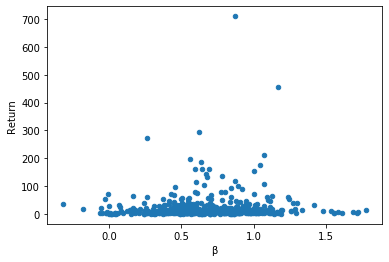

In [91]:
ax1 = mdata.plot.scatter(x='β',y='Return')

In [98]:
mdata.to_csv(path + '\\beta.csv',index = False)

In [96]:
mdata

,name,Year,Month,jalaliDate,date,group_name,close_price,Day,30return,MonthlyReturn,...,E30return,EMonthlyReturn,EMonthlyMarketReturn,u,α,β,σu,σr,Average EMonthlyReturn,Return
0,آ س پ,1399,07,13990720,20201011,انبوه سازي، املاك و مستغلات,14551.0,20,-9.373443,-7.265311,...,-10.706776,-8.598645,-12.015392,4.131711,-1.179823,0.961311,9.454945,13.267930,1.349304,3.007436
1,آتيمس,1399,07,13990720,20201011,صندوق سرمايه گذاري قابل معامله,228092.0,20,-14.402372,-3.921618,...,-15.735705,-5.254952,-12.015392,5.807081,0.266856,0.942865,4.268920,12.649800,5.970587,19.832222
2,آرمان,1399,07,13990720,20201011,بيمه وصندوق بازنشستگي به جزتامين اجتماعي,6007.0,20,57.622671,9.218182,...,56.289338,7.884848,-12.015392,12.135475,0.668587,0.409409,12.347697,13.066067,2.008425,3.218399
3,آريان,1399,07,13990720,20201011,سرمايه گذاريها,15112.0,20,-26.419320,3.146543,...,-27.752654,1.813210,-12.015392,16.164879,-0.425707,1.159010,12.331562,17.564528,2.271490,6.360935
4,آساس,1399,07,13990720,20201011,صندوق سرمايه گذاري قابل معامله,171385.0,20,3.645446,3.367893,...,2.312113,2.034560,-12.015392,11.691300,0.323879,0.830653,4.082370,9.743479,2.419211,18.431406
5,آسام,1399,07,13990720,20201011,صندوق سرمايه گذاري قابل معامله,107667.0,20,-13.200474,-1.618268,...,-14.533807,-2.951601,-12.015392,4.905207,-0.570219,0.606438,3.861664,7.480963,1.016077,8.486915
6,آسيا,1399,07,13990720,20201011,بيمه وصندوق بازنشستگي به جزتامين اجتماعي,30930.0,20,-16.877184,19.190751,...,-18.210517,17.857418,-12.015392,28.623849,0.012327,0.897079,14.003358,16.238447,2.221758,11.552760
7,آكنتور,1395,06,13950613,20160903,ابزارپزشکي، اپتيکي و اندازه‌گيري,46567.0,13,-7.144566,-3.452065,...,-8.394566,-4.702065,-3.344099,-3.112572,1.359997,0.881998,18.794232,19.439115,1.968963,9.185258
8,آكورد,1399,07,13990720,20201011,صندوق سرمايه گذاري قابل معامله,28844.0,20,1.281646,1.008545,...,-0.051687,-0.324789,-12.015392,0.265905,0.148412,0.061513,1.091528,1.316492,0.436928,1.716775
9,آپ,1399,07,13990720,20201011,رايانه و فعاليت‌هاي وابسته به آن,20660.0,20,-31.544069,-5.272811,...,-32.877402,-6.606144,-12.015392,-1.997885,-0.803748,0.316636,14.620427,15.149602,0.966494,0.322917


In [94]:
path


'H:\\Economics\\Finance(Prof.Heidari-Aghajanzadeh)\\Data'

In [163]:
gdata2 = data.groupby(['name'])
def beta(g):
    y = 'EMonthlyReturn'
    x = 'EMonthlyMarketReturn'
    g = g.dropna()
    # Add a constant term like so:
    if len(g)>30:
        try:
            model = sm.OLS(g[y], sm.add_constant(g[x])).fit()
            beta = model.params[1]
            alpha = model.params[0] 
            g['u'] = g[y] - alpha - beta * g[x]
        except:
            beta = np.nan
            alpha = np.nan
            g['u'] = np.nan
    else:
        beta = np.nan
        alpha = np.nan
        g['u'] = np.nan
        
    g['α'] = alpha
    g['β'] = beta
    return g

data2 = gdata2.apply(beta)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [168]:
cdata2 = data2[~data2['β'].isnull()].reset_index(drop= True)

In [169]:
mdata2 = cdata2.groupby(['name']).last()

In [171]:
mdata2.describe()

,jalaliDate,date,close_price,30return,MonthlyReturn,Index,30Market_return,MRiskFree,MonthlyMarketReturn,E30Market_return,E30return,EMonthlyReturn,EMonthlyMarketReturn,α,β
count,6.400000e+02,6.400000e+02,640.000000,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,1.399015e+07,2.020046e+07,43067.717187,-10.493483,-0.636929,1.538818e+06,-5.955755,1.334896,-9.468032,-7.290651,-11.828379,-1.971825,-10.802928,1.688758,0.629875
std,5.034466e+03,4.898623e+03,55625.257361,23.955865,11.258857,2.127362e+05,9.404698,0.032262,6.842497,9.405063,23.955611,11.258973,6.840038,12.130454,1.101885
min,1.390081e+07,2.011110e+07,708.000000,-95.451587,-67.290729,2.600150e+04,-23.926075,1.250000,-10.682059,-25.259409,-96.784920,-68.624062,-12.015392,-212.886541,-19.258275
25%,1.399072e+07,2.020101e+07,11887.500000,-23.574572,-6.242324,1.541843e+06,-7.081681,1.333333,-10.682059,-8.415015,-24.907905,-7.575657,-12.015392,-0.338562,0.423176
50%,1.399072e+07,2.020101e+07,23838.000000,-12.389564,-1.362538,1.597045e+06,-7.081681,1.333333,-10.682059,-8.415015,-13.722897,-2.695871,-12.015392,0.727854,0.635548
75%,1.399072e+07,2.020101e+07,48649.500000,0.062582,3.377174,1.597045e+06,-6.556489,1.333333,-10.682059,-7.889822,-1.270751,2.043841,-12.015392,2.848019,0.882169
max,1.399072e+07,2.020101e+07,517440.000000,175.856473,51.599071,1.975545e+06,93.152510,1.666667,47.306343,91.819177,174.523140,50.265738,45.973009,186.379531,16.467952


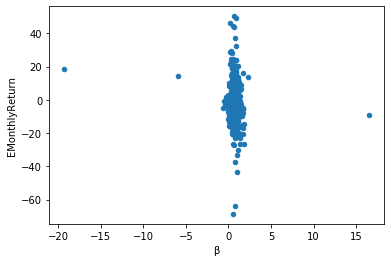

In [172]:
ax1 = mdata2.plot.scatter(x='β',y='EMonthlyReturn')

In [173]:
mdata2.to_csv(path + '\\beta2.csv',index = False)

In [185]:
rdata['Return'] = (data.groupby(['name']).last()['close_price'] - data.groupby(['name']).first()['close_price'] )/(data.groupby(['name']).first()['close_price']) 

In [188]:
rdata = rdata.reset_index()

In [190]:
mdata2 = mdata2.reset_index()

In [196]:
rdata =  rdata[['name','Return']]

In [199]:
mdata.merge(rdata,on = 'name').to_csv(path + '\\beta.csv',index = False)